In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [273]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [274]:
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


In [275]:
from sklearn.model_selection import train_test_split

In [276]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [277]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [278]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender_Male, Length: 10000, dtype: int64

In [279]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [280]:
from sklearn.preprocessing import StandardScaler

In [281]:
sc = StandardScaler()

In [282]:
X_train_scaled  = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [283]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ..., -0.50429326,
         1.71490137, -0.57273139],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.50429326,
        -0.58312392, -0.57273139],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.98297314,
         1.71490137, -0.57273139],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ...,  1.98297314,
        -0.58312392, -0.57273139],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.50429326,
        -0.58312392, -0.57273139],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.98297314,
         1.71490137, -0.57273139]])

In [284]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [300]:
model = Sequential()

In [301]:
X_train.shape

(8000, 11)

In [302]:
model.add(Dense(3,activation='relu',input_dim=11))
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/home/sai-deekshith/Documents/Machine_Learning/.venv1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [303]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [304]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [305]:
hist  = model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5042 - loss: 0.7014 - val_accuracy: 0.5431 - val_loss: 0.6904
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5413 - loss: 0.6897 - val_accuracy: 0.5475 - val_loss: 0.6888
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5440 - loss: 0.6884 - val_accuracy: 0.5481 - val_loss: 0.6886
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5514 - loss: 0.6884 - val_accuracy: 0.5419 - val_loss: 0.6888
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5581 - loss: 0.6879 - val_accuracy: 0.5412 - val_loss: 0.6890
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5434 - loss: 0.6881 - val_accuracy: 0.5406 - val_loss: 0.6890
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5514 - loss: 0.6870 - val_accuracy: 0.5400 - val_loss: 0.6890
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5527 - loss: 0.6874 - val_accuracy: 0.

In [306]:
model.layers[0].get_weights()

[array([[ 0.580605  ,  0.20488757, -0.10343745],
        [-0.46726057,  0.28064507, -0.27293164],
        [ 0.2424576 , -0.49313182,  0.28332046],
        [-0.55265445, -0.26254952, -0.6405224 ],
        [-0.35673866,  0.34680882, -0.21902226],
        [ 0.50034857, -0.4121197 , -0.06212777],
        [ 0.33864632, -0.39006966,  0.03980129],
        [-0.48513976,  0.22534509, -0.02630258],
        [-0.2970925 , -0.448214  ,  0.24387445],
        [-0.7155071 ,  0.57093954, -0.47071478],
        [-0.15528485, -0.04648222, -0.5589681 ]], dtype=float32),
 array([ 0.06672402, -0.22596452, -0.00653605], dtype=float32)]

In [307]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [308]:
y_pred = np.where(y_log>0.49,1,0)

In [309]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [310]:
from sklearn.metrics import accuracy_score

In [311]:
accuracy_score(y_test,y_pred)

0.5485

In [312]:
import matplotlib.pyplot as plt

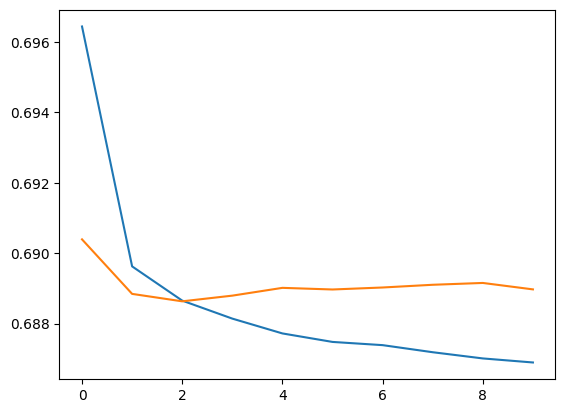

In [313]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

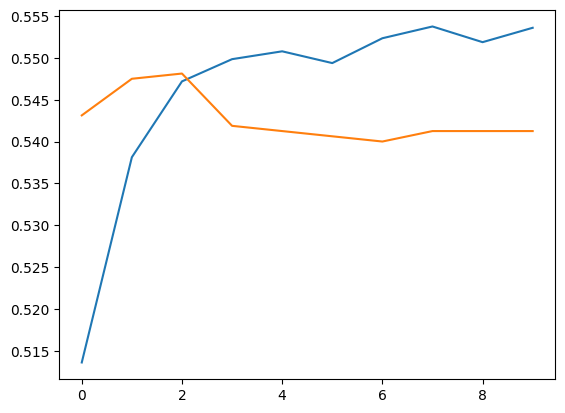

In [314]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])